In [1]:
import face_recognition
import numpy as np
import math
import cv2
import dlib
import os, sys

In [2]:
def face_confidence(face_distance, face_match_threshold=0.6):
    range = (1.0 - face_match_threshold)
    linear_val = (1.0 - face_distance)/(range*2.0)
    if face_distance > face_match_threshold:
        return str(round(linear_val * 100, 2)) + '%'
    else:
        value = (linear_val + ((1.0 - linear_val) * math.pow((linear_val - 0.5) * 2, 0.2))) * 100
        return str(round(value , 2)) + '%'
    
class facerecognition:
    face_loc = []
    face_enc = []
    face_name = []
    known_face_enc = []
    known_face_names = []
    process_current_frame = []
    def __init__(self):
        self.encode_faces()


    def encode_faces(self):
        for image in os.listdir('faces'):
            face_image = face_recognition.load_image_file(f'faces/{image}')
            face_enc = face_recognition.face_encodings(face_image)[0]

            self.known_face_enc.append(face_enc)
            self.known_face_names.append(image)
        print(self.known_face_names)
    
    def run_rec(self):
        video_cap = cv2.VideoCapture(0)

        if not video_cap.isOpened():
            sys.exit('Video Source not found!')
        
        while True:
            ret, frame = video_cap.read()

            if self.process_current_frame:
                small_frame = cv2.resize(frame, (0,0), fx=0.25, fy=0.25)
                rgb_small_frame = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB)

                #find all faces in current frame

                self.face_loc = face_recognition.face_locations(rgb_small_frame)
                self.face_enc = face_recognition.face_encodings(rgb_small_frame, self.face_loc)

                self.face_name = []
                for face_enc in self.face_enc:
                    matches = face_recognition.compare_faces(self.known_face_enc, face_enc)
                    name = 'Unknown'
                    confidence = 'Unknown'

                    face_distances = face_recognition.face_distance(self.known_face_enc, face_enc)
                    best_match_in = np.argmin(face_distances)

                    if matches[best_match_in]:
                        name = self.known_face_names[best_match_in]
                        confidence = face_confidence(face_distances[best_match_in])
                    

                    self.face_name.append(f'{name} ({confidence})')
            
            self.process_current_frame = not self.process_current_frame

            #display annotation
            for (top, right, bottom, left), name in zip(self.face_loc, self.face_name):
                top *=4
                right *=4
                bottom *=4
                left *=4

                cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
                cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), -1)
                cv2.putText(frame , name, (left + 6, bottom - 6), cv2.FONT_HERSHEY_DUPLEX, 0.8, (255, 255, 255),1)
            
            cv2.imshow('Face Recognition', frame)

            if cv2.waitKey(1) == ord('q'):
                break
        
        video_cap.release()
        cv2.destroyAllWindows()

In [3]:
fr = facerecognition()
fr.run_rec()

['surya(1).jpg', 'surya(2).jpg', 'surya3.jpg', 'surya4.jpg']


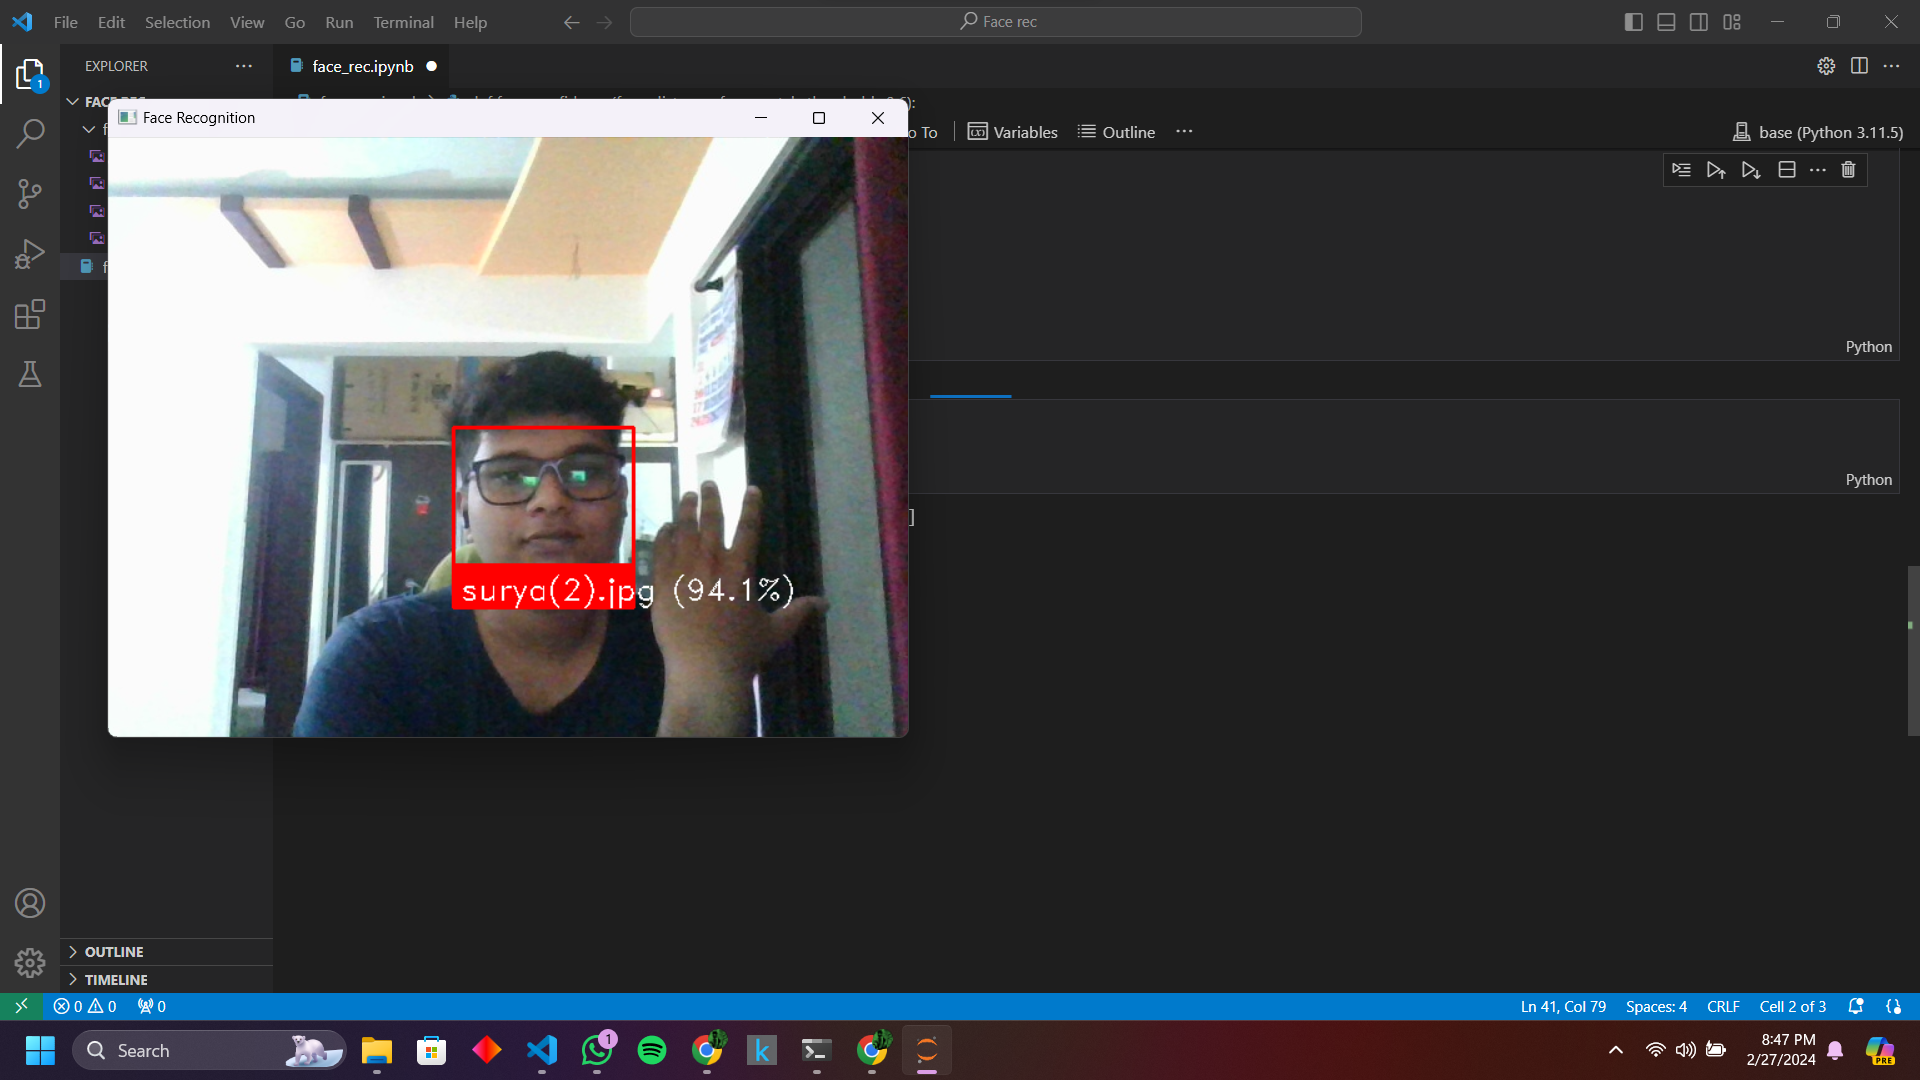

In [2]:
from IPython.display import Image
image_path = 'output.png'
Image(filename=image_path)